In [2]:
import pandas as pd
df=pd.read_csv("titanic.csv")

In [3]:
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
df.isnull().sum()


PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [5]:
# Fill missing Age values with the median age
df['Age'].fillna(df['Age'].median(), inplace=True)


In [10]:

df['Cabin'].fillna(df['Cabin'].mode()[0], inplace=True)
df['Fare'].ffill(inplace=True)



In [11]:
df.isnull().sum()


PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [12]:
# Drop 'PassengerId' and 'Ticket' columns as they may not be useful for analysis
df.drop(['PassengerId', 'Ticket'], axis=1, inplace=True)

In [13]:
df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,B57 B59 B63 B66,Q
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,B57 B59 B63 B66,S
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,B57 B59 B63 B66,Q
3,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,B57 B59 B63 B66,S
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,B57 B59 B63 B66,S


In [14]:
# Summary statistics for numerical features
df.describe()

,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000
mean,2.265550,29.599282,0.447368,0.392344,35.560845
std,0.841838,12.703770,0.896760,0.981429,55.856972
min,1.000000,0.170000,0.000000,0.000000,0.000000
25%,1.000000,23.000000,0.000000,0.000000,7.895800
50%,3.000000,27.000000,0.000000,0.000000,14.454200
75%,3.000000,35.750000,1.000000,0.000000,31.471875
max,3.000000,76.000000,8.000000,9.000000,512.329200


In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

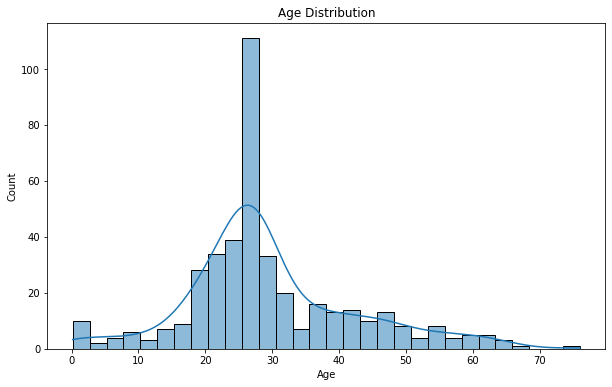

In [16]:
# Distribution of Age
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.show()


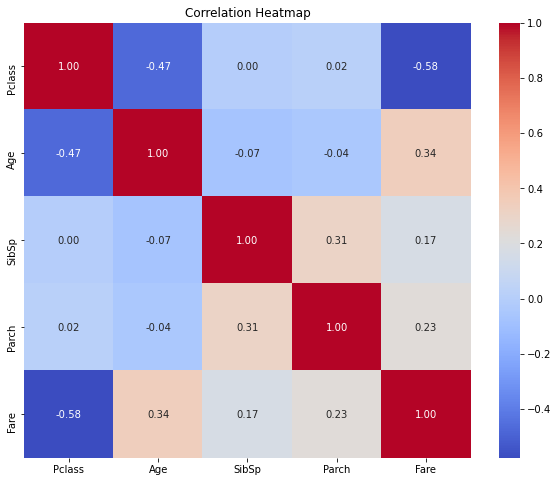

In [18]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [21]:
# Pivot Table for average Fare by Sex and Pclass
pivot_table = df.pivot_table(values='Fare', index='Sex', columns='Pclass', aggfunc=np.mean)
print(pivot_table)




Pclass           1          2          3
Sex                                     
female  115.591168  26.438750  13.735129
male     75.586551  20.184654  11.799429
